In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler

In [52]:
df=pd.read_csv("EV Dataset.csv")

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301247 entries, 0 to 301246
Data columns (total 34 columns):
 #   Column                                                           Non-Null Count   Dtype  
---  ------                                                           --------------   -----  
 0   Clean Alternative Fuel Vehicle Type                              301247 non-null  object 
 1   VIN (1-10)                                                       301247 non-null  object 
 2   DOL Vehicle ID                                                   301247 non-null  int64  
 3   Model Year                                                       301247 non-null  int64  
 4   Make                                                             301247 non-null  object 
 5   Model                                                            301247 non-null  object 
 6   Primary Use                                                      301247 non-null  object 
 7   Electric Range               

In [54]:
df.columns

Index(['Clean Alternative Fuel Vehicle Type', 'VIN (1-10)', 'DOL Vehicle ID',
       'Model Year', 'Make', 'Model', 'Primary Use', 'Electric Range',
       'Odometer Reading', 'Odometer Reading Description',
       'New or Used Vehicle', 'Sale Price', 'Sale Date', 'Base MSRP',
       'Transaction Type', 'Transaction Date', 'Year', 'County', 'City',
       'State', 'Postal Code',
       '2019 HB 2042: Clean Alternative Fuel Vehicle (CAFV) Eligibility',
       'Meets 2019 HB 2042 Electric Range Requirement',
       'Meets 2019 HB 2042 Sale Date Requirement',
       'Meets 2019 HB 2042 Sale Price/Value Requirement',
       '2019 HB 2042: Battery Range Requirement',
       '2019 HB 2042: Purchase Date Requirement',
       '2019 HB 2042: Sale Price/Value Requirement',
       'Electric Vehicle Fee Paid', 'Transportation Electrification Fee Paid',
       'Hybrid Vehicle Electrification Fee Paid', '2020 GEOID',
       'Legislative District', 'Electric Utility'],
      dtype='object')

In [55]:
df.head()

,Clean Alternative Fuel Vehicle Type,VIN (1-10),DOL Vehicle ID,Model Year,Make,Model,Primary Use,Electric Range,Odometer Reading,Odometer Reading Description,...,Meets 2019 HB 2042 Sale Price/Value Requirement,2019 HB 2042: Battery Range Requirement,2019 HB 2042: Purchase Date Requirement,2019 HB 2042: Sale Price/Value Requirement,Electric Vehicle Fee Paid,Transportation Electrification Fee Paid,Hybrid Vehicle Electrification Fee Paid,2020 GEOID,Legislative District,Electric Utility
0,Battery Electric Vehicle (BEV),1N4CZ1CVXR,271991989,2024,NISSAN,Leaf,Passenger,0.0,16,Actual Mileage,...,True,Battery range requirement is met,Purchase date requirement is met,Sale price/value requirement is met,Not Applicable,Not Applicable,Not Applicable,5.301104e+10,18.0,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...
1,Battery Electric Vehicle (BEV),KM8KRDAF6P,244172736,2023,HYUNDAI,Ioniq 5,Passenger,0.0,15,Actual Mileage,...,False,Battery range requirement is met,Purchase date requirement is met,The sale price is too high,Not Applicable,Not Applicable,Not Applicable,5.303303e+10,11.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
2,Plug-in Hybrid Electric Vehicle (PHEV),YV4BR0DK0M,142604045,2021,VOLVO,XC60,Passenger,18.0,226,Actual Mileage,...,False,Battery range is too low,Purchase date requirement is met,The sale price is too high,Not Applicable,Not Applicable,Not Applicable,5.303303e+10,5.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
3,Plug-in Hybrid Electric Vehicle (PHEV),5UX43EU08R,258394972,2024,BMW,X5,Passenger,39.0,6152,Actual Mileage,...,False,Battery range requirement is met,Purchase date requirement is met,The sale price is too high,Not Applicable,Not Applicable,Not Applicable,5.303301e+10,43.0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
4,Battery Electric Vehicle (BEV),1FTVW1EL2P,264309545,2023,FORD,F-150,Truck,0.0,71,Actual Mileage,...,False,Battery range requirement is met,Purchase date requirement is met,The sale price is too high,Not Applicable,Not Applicable,Not Applicable,5.301104e+10,17.0,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...


In [56]:
df.tail()

,Clean Alternative Fuel Vehicle Type,VIN (1-10),DOL Vehicle ID,Model Year,Make,Model,Primary Use,Electric Range,Odometer Reading,Odometer Reading Description,...,Meets 2019 HB 2042 Sale Price/Value Requirement,2019 HB 2042: Battery Range Requirement,2019 HB 2042: Purchase Date Requirement,2019 HB 2042: Sale Price/Value Requirement,Electric Vehicle Fee Paid,Transportation Electrification Fee Paid,Hybrid Vehicle Electrification Fee Paid,2020 GEOID,Legislative District,Electric Utility
301242,Battery Electric Vehicle (BEV),7SAYGDEF6R,269309946,2024,TESLA,Model Y,Passenger,0.0,15,Actual Mileage,...,False,Battery range requirement is met,Purchase date requirement is met,The sale price is too high,Not Applicable,Not Applicable,Not Applicable,5.301104e+10,17.0,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...
301243,Battery Electric Vehicle (BEV),5YJ3E1EA2J,7936183,2018,TESLA,Model 3,Passenger,215.0,112985,Actual Mileage,...,True,Battery range requirement is met,Purchase date requirement is met,Sale price/value requirement is met,Not Applicable,Not Applicable,Not Applicable,5.305306e+10,29.0,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...
301244,Battery Electric Vehicle (BEV),5YJ3E1EB3R,270138634,2024,TESLA,Model 3,Passenger,0.0,15,Actual Mileage,...,False,Battery range requirement is met,Purchase date requirement is met,The sale price is too high,Not Applicable,Not Applicable,Not Applicable,5.303300e+10,36.0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
301245,Battery Electric Vehicle (BEV),7FCTGBAA2P,269879760,2023,RIVIAN,R1T,Truck,0.0,100,Actual Mileage,...,False,Battery range requirement is met,Purchase date requirement is met,The sale price is too high,Not Applicable,Not Applicable,Not Applicable,5.305795e+10,10.0,PUGET SOUND ENERGY INC
301246,Battery Electric Vehicle (BEV),7SAYGAEE2R,267937848,2024,TESLA,Model Y,Passenger,0.0,15,Actual Mileage,...,False,Battery range requirement is met,Purchase date requirement is met,The sale price is too high,Not Applicable,Not Applicable,Not Applicable,5.305307e+10,31.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)


In [57]:
df.isna().sum()

Clean Alternative Fuel Vehicle Type                                0
VIN (1-10)                                                         0
DOL Vehicle ID                                                     0
Model Year                                                         0
Make                                                               0
Model                                                              0
Primary Use                                                        0
Electric Range                                                     0
Odometer Reading                                                   0
Odometer Reading Description                                       0
New or Used Vehicle                                                0
Sale Price                                                         0
Sale Date                                                          0
Base MSRP                                                          0
Transaction Type                  

In [58]:
# Observ that some Sale Price is 0
df2 = df[df['Sale Price'] > 0]

In [59]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 286056 entries, 0 to 301246
Data columns (total 34 columns):
 #   Column                                                           Non-Null Count   Dtype  
---  ------                                                           --------------   -----  
 0   Clean Alternative Fuel Vehicle Type                              286056 non-null  object 
 1   VIN (1-10)                                                       286056 non-null  object 
 2   DOL Vehicle ID                                                   286056 non-null  int64  
 3   Model Year                                                       286056 non-null  int64  
 4   Make                                                             286056 non-null  object 
 5   Model                                                            286056 non-null  object 
 6   Primary Use                                                      286056 non-null  object 
 7   Electric Range                    

In [60]:
missing_values = df.isnull().sum()
missing_values

Clean Alternative Fuel Vehicle Type                                0
VIN (1-10)                                                         0
DOL Vehicle ID                                                     0
Model Year                                                         0
Make                                                               0
Model                                                              0
Primary Use                                                        0
Electric Range                                                     0
Odometer Reading                                                   0
Odometer Reading Description                                       0
New or Used Vehicle                                                0
Sale Price                                                         0
Sale Date                                                          0
Base MSRP                                                          0
Transaction Type                  

In [61]:
duplicate_count = df2.duplicated().sum()
duplicate_count

0

In [62]:
# outliers in Sale Price
# IQR method
Q1 = df2['Sale Price'].quantile(0.25)
Q3 = df2['Sale Price'].quantile(0.75)
IQR = Q3 - Q1

In [63]:
# Setting lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out extreme outliers
df3 = df2[(df2['Sale Price'] >= lower_bound) & (df2['Sale Price'] <= upper_bound)]

In [64]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 274658 entries, 0 to 301246
Data columns (total 34 columns):
 #   Column                                                           Non-Null Count   Dtype  
---  ------                                                           --------------   -----  
 0   Clean Alternative Fuel Vehicle Type                              274658 non-null  object 
 1   VIN (1-10)                                                       274658 non-null  object 
 2   DOL Vehicle ID                                                   274658 non-null  int64  
 3   Model Year                                                       274658 non-null  int64  
 4   Make                                                             274658 non-null  object 
 5   Model                                                            274658 non-null  object 
 6   Primary Use                                                      274658 non-null  object 
 7   Electric Range                    

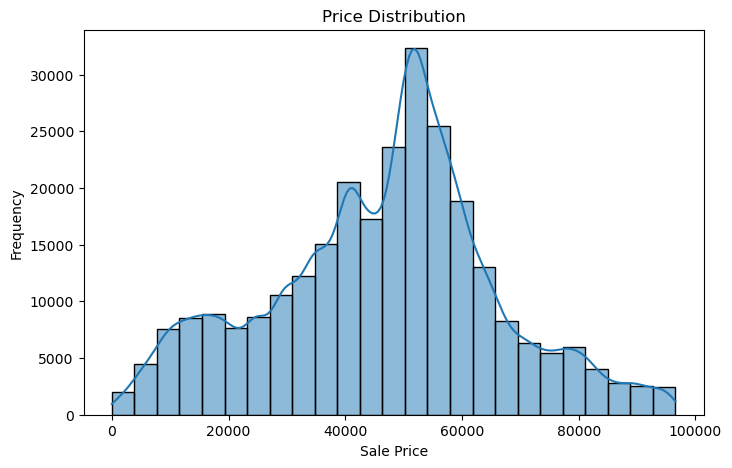

In [65]:
# Visualize Price Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df3['Sale Price'], bins=25, kde=True)
plt.title("Price Distribution")
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.show()

In [66]:
# Quantile-based Segmentation (Low, Mid, High Pricing)
df3['Price Segment'] = pd.qcut(df3['Sale Price'], q=3, labels=['Low', 'Mid', 'High'])

# K-Means Clustering for Automated Segmentation
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df3['Price Cluster'] = kmeans.fit_predict(df3[['Sale Price']])

# Map Cluster Numbers to Readable Labels
price_cluster_mapping = {0: "Budget", 1: "Mid-Range", 2: "Premium"}
df3['Price Cluster'] = df3['Price Cluster'].map(price_cluster_mapping)

# Save the segmented dataset
#df.to_csv("EV_Dataset_Segmented.csv", index=False)

# Display Sample Data
df3[['Sale Price', 'Price Segment', 'Price Cluster']].head()

C:\Users\kthor\AppData\Local\Temp\ipykernel_12044\2969619507.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Price Segment'] = pd.qcut(df3['Sale Price'], q=3, labels=['Low', 'Mid', 'High'])
C:\Users\kthor\AppData\Local\Temp\ipykernel_12044\2969619507.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Price Cluster'] = kmeans.fit_predict(df3[['Sale Price']])
C:\Users\kthor\AppData\Local\Temp\ipykernel_12044\2969619507.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

,Sale Price,Price Segment,Price Cluster
0,35665,Low,Premium
1,58225,High,Premium
2,60000,High,Premium
3,77695,High,Budget
4,53985,Mid,Premium


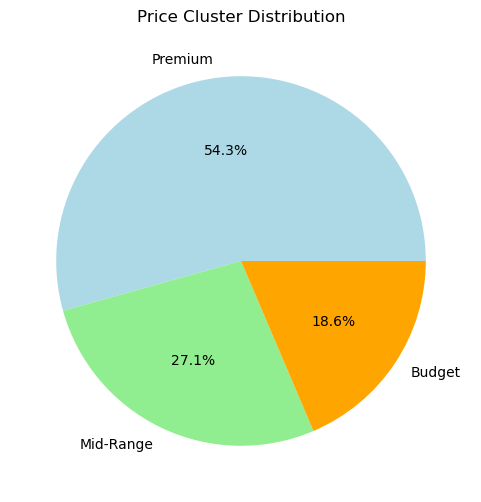

In [67]:
# Pie Chart for Price Clusters
plt.figure(figsize=(6, 6))
df3['Price Cluster'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'orange'])
plt.title("Price Cluster Distribution")
plt.ylabel("")
plt.show()

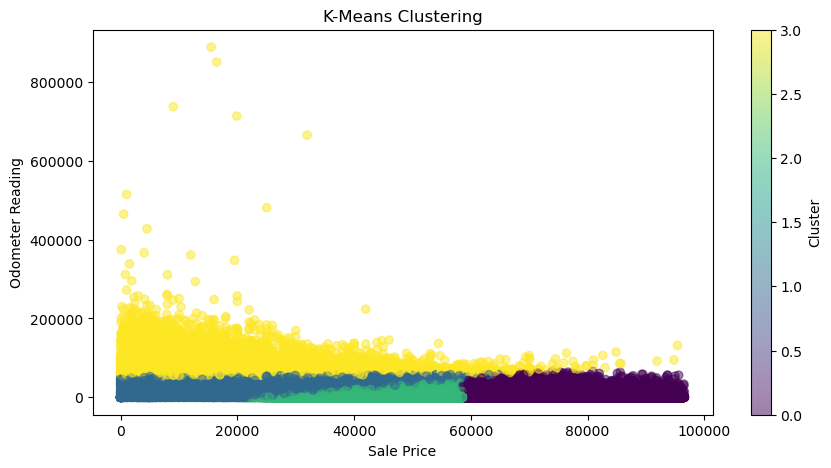

In [68]:
# Selecting features for clustering
features = df3[["Sale Price", "Odometer Reading"]].copy()
features = features.dropna()  # Remove missing values

# Standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# --- K-Means Clustering ---
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(features_scaled)

# Plot K-Means Clusters
plt.figure(figsize=(10, 5))
plt.scatter(features["Sale Price"], features["Odometer Reading"], c=kmeans_labels, cmap='viridis', alpha=0.5)
plt.title("K-Means Clustering")
plt.xlabel("Sale Price")
plt.ylabel("Odometer Reading")
plt.colorbar(label="Cluster")
plt.show()

In [69]:
# Selecting features for clustering
features = df3[["Sale Price", "Odometer Reading"]].dropna().astype(np.float32).sample(n=50000, random_state=42)

# Standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# --- Simple DBSCAN Clustering ---
dbscan = DBSCAN(eps=1.0, min_samples=5)  # Slightly relaxed parameters
dbscan_labels = dbscan.fit_predict(features_scaled)

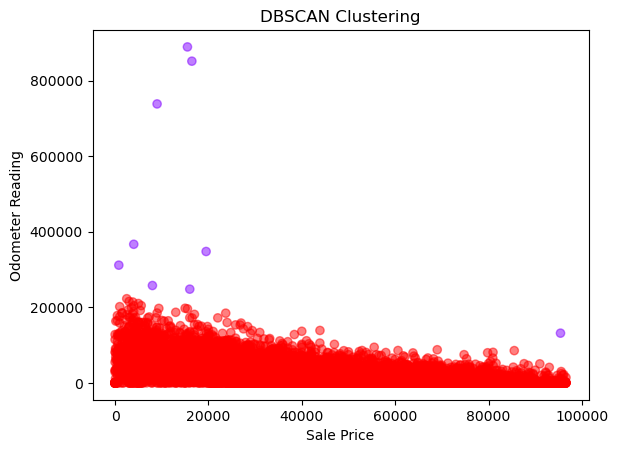

C:\Users\kthor\AppData\Local\Temp\ipykernel_12044\3740938578.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.loc[features.index, "DBSCAN Cluster"] = dbscan_labels


In [70]:
# Plot DBSCAN Clusters
plt.scatter(features["Sale Price"], features["Odometer Reading"], c=dbscan_labels, cmap='rainbow', alpha=0.5)
plt.title("DBSCAN Clustering")
plt.xlabel("Sale Price")
plt.ylabel("Odometer Reading")
plt.show()

# Add cluster labels to DataFrame
df3.loc[features.index, "DBSCAN Cluster"] = dbscan_labels